# EDA in RFCX
https://www.kaggle.com/hamditarek/rainforest-connection-analysis-using-librosa

## Loading an audio file

In [1]:
import wandb

In [2]:
wandb.init(project="abc", group="test")

NameError: name 'config' is not defined

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import librosa

OSError: Could not load shared object file: llvmlite.dll

In [2]:
# read data
audio_data = '../input/rfcx-species-audio-detection/train/00204008d.flac'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

NameError: name 'librosa' is not defined

In [3]:
librosa.load(audio_data, sr=44100)

NameError: name 'librosa' is not defined

In [4]:
audio = librosa.load(audio_data, sr=44100)
audio[0]

NameError: name 'librosa' is not defined

In [5]:
# fracはなぜか読み込めないので，numpy形式でロード
import IPython.display as ipd
ipd.Audio(audio[0], rate=44100)

NameError: name 'audio' is not defined

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

# 周波数振幅
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

ImportError: DLL load failed while importing ft2font: 指定されたモジュールが見つかりません。

## Spectrogram

- スペクトログラムは、特定の波形に存在する様々な周波数における信号の強度、つまり「ラウドネス」を時間の経過とともに視覚的に表現する方法です。例えば、2 Hz vs 10 Hzのように、エネルギーが多いか少ないかを見ることができるだけでなく、エネルギーレベルが時間の経過とともにどのように変化するかを見ることもできます。
- スペクトログラムは通常、ヒートマップ、すなわち、色や明るさを変化させることによって示される強度を持つ画像として描かれます。

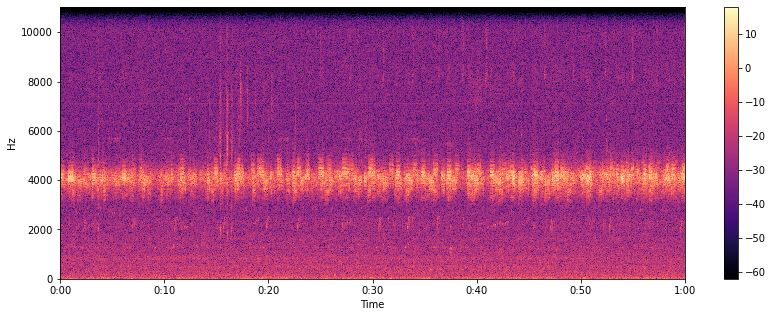

In [7]:
# Short-time Fourier transform
X = librosa.stft(x)

# amplitude to db
Xdb = librosa.amplitude_to_db(abs(X))

# visualize spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

- .stft() はデータを短期フーリエ変換に変換します。STFT は、与えられた時間に与えられた周波数の振幅を知ることができるように信号を変換します。STFTを使うと、オーディオ信号のある時間に再生されている様々な周波数の振幅を決定することができます。.specshowはスペクトログラムを表示するのに使われます。
- 縦軸は周波数（0から10kHzまで）を示し、横軸はクリップの時間を示しています。すべての動作がスペクトルの一番下で行われていることがわかるので、周波数軸を対数に変換することができます。

C:\Users\tatsuya.takahashi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tatsuya.takahashi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\tatsuya.takahashi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


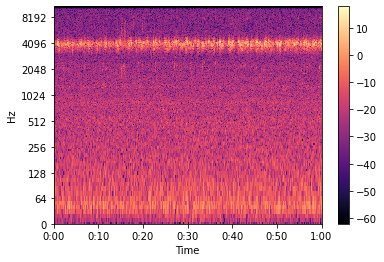

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Create an Audio Signal

In [9]:
# In new Librosa version, you need to use soundfile
import soundfile as sf

In [10]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
sf.write('tone_220.wav', x, sr)

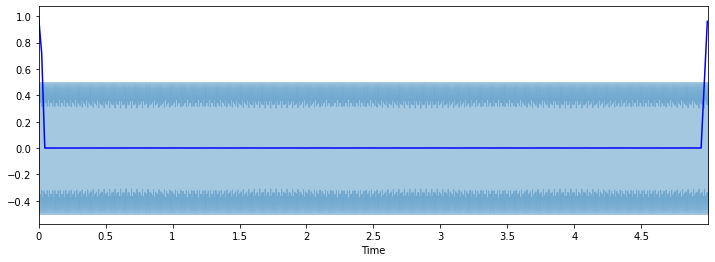

In [11]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

- .spectral_centroidは、サンプルに存在するフレーム数に等しい列を持つ配列を返します。

## Spectral Rolloff

- これは信号の形状の尺度です。それを得るためには、パワースペクトルの中でパワーの85%が低い周波数にあるビンの割合を計算しなければなりません。
- librosa.feature.spectral_rolloffは信号の各フレームのロールオフ周波数を計算します:¶。

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Spectral Bandwidth


- スペクトル帯域幅は、ピークの最大値の半分（または最大値の半分[FWHM]の全幅）における光の帯域幅として定義され、波長軸上の2本の垂直な赤い線とλSBで表されます。

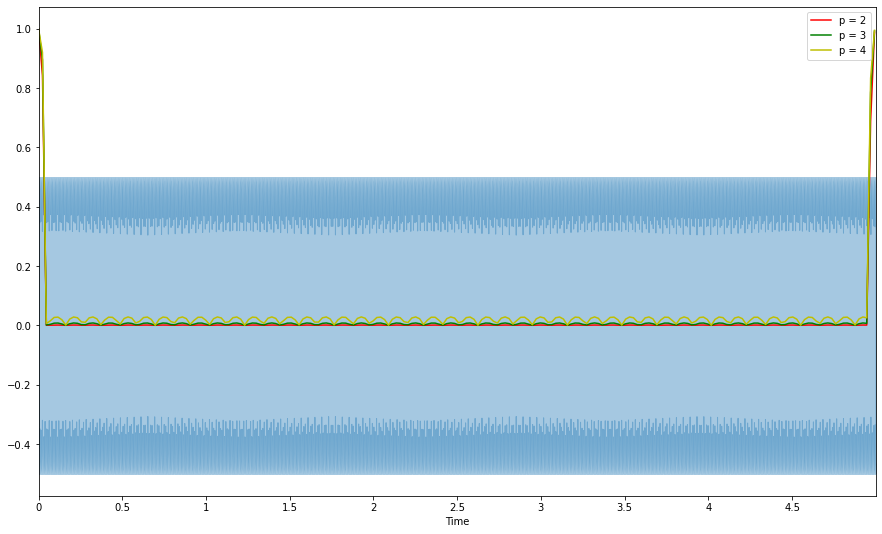

In [13]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

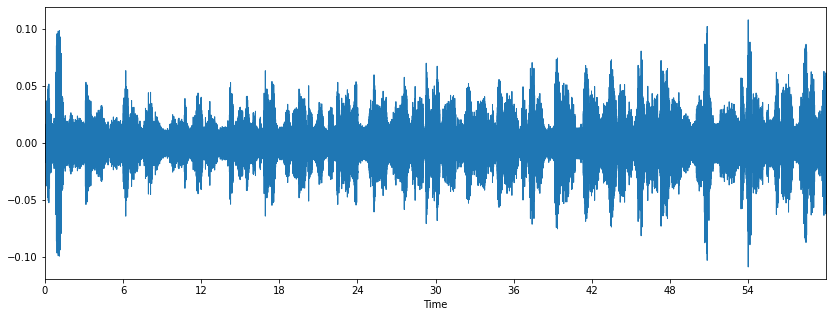

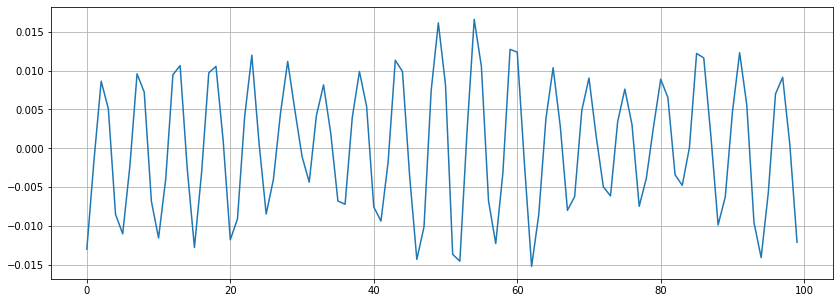

In [14]:
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

## How many zero crossings?


In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

38


## Mel-Frequency Cepstral Coefficients(MFCCs)¶


(20, 2584)


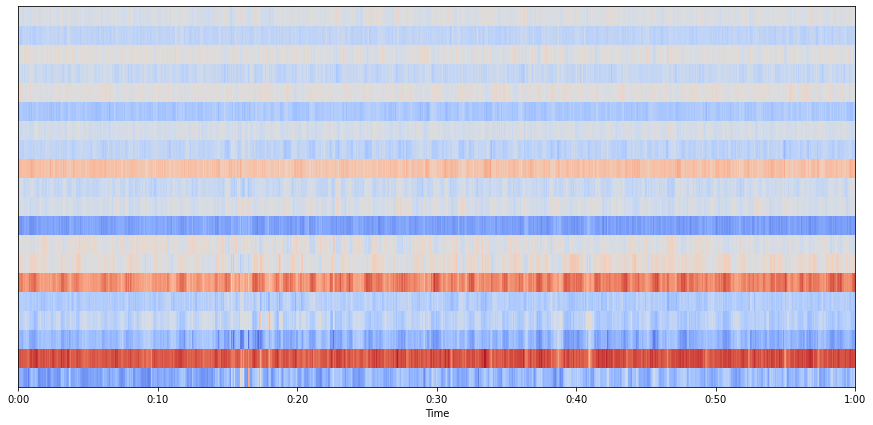

In [16]:
fs=10
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma feature


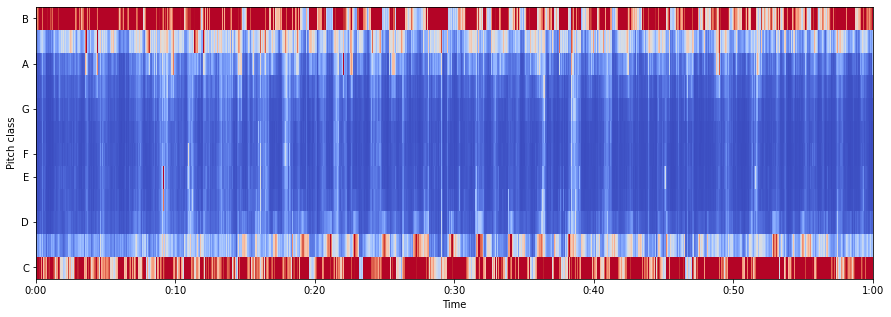

In [17]:
hop_length=12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## Modeling

- I will use some existing kernels. [Inference] ResNest RFCX Audio Detection by kkiller

In [18]:
from pathlib import Path
import librosa as lb
import torch
from  torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from resnest.torch import resnest50

In [19]:
NUM_CLASSES = 24
SR = 16_000
DURATION =  60
DATA_ROOT = Path("../input/rfcx-species-audio-detection")
TRAIN_AUDIO_ROOT = Path("../input/rfcx-species-audio-detection/train")
TEST_AUDIO_ROOT = Path("../input/rfcx-species-audio-detection/test")

In [20]:
class MelSpecComputer:
    def __init__(self, sr, n_mels, fmin, fmax):
        self.sr = sr
        self.n_mels = n_mels
        self.fmin = fmin
        self.fmax = fmax

    def __call__(self, y):

        melspec = lb.feature.melspectrogram(
            y, sr=self.sr, n_mels=self.n_mels, fmin=self.fmin, fmax=self.fmax,
        )

        melspec = lb.power_to_db(melspec).astype(np.float32)
        return melspec

In [21]:
def mono_to_color(X, eps=1e-6, mean=None, std=None):
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    X = (X - mean) / (std + eps)

    # Normalize to [0, 255]
    _min, _max = X.min(), X.max()

    if (_max - _min) > eps:
        V = np.clip(X, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)

    return V


def normalize(image, mean=None, std=None):
    image = image / 255.0
    if mean is not None and std is not None:
        image = (image - mean) / std
    return np.moveaxis(image, 2, 0).astype(np.float32)


def crop_or_pad(y, length, sr, is_train=True):
    if len(y) < length:
        y = np.concatenate([y, np.zeros(length - len(y))])
    elif len(y) > length:
        if not is_train:
            start = 0
        else:
            start = np.random.randint(len(y) - length)

        y = y[start:start + length]

    y = y.astype(np.float32, copy=False)

    return y

In [22]:
class RFCXDataset(Dataset):

    def __init__(self, data, sr, n_mels=128, fmin=0, fmax=None,  is_train=False,
                 num_classes=NUM_CLASSES, root=None, duration=DURATION):

        self.data = data
        
        self.sr = sr
        self.n_mels = n_mels
        self.fmin = fmin
        self.fmax = fmax or self.sr//2

        self.is_train = is_train

        self.num_classes = num_classes
        self.duration = duration
        self.audio_length = self.duration*self.sr
        
        self.root =  root or (TRAIN_AUDIO_ROOT if self.is_train else TEST_AUDIO_ROOT)

        self.wav_transfos = get_wav_transforms() if self.is_train else None

        self.mel_spec_computer = MelSpecComputer(sr=self.sr, n_mels=self.n_mels, fmin=self.fmin, fmax=self.fmax)


    def __len__(self):
        return len(self.data)
    
    def read_index(self, idx, fill_val=1.0, offset=None, use_offset=True):
        d = self.data.iloc[idx]
        record, species = d["recording_id"], d["species_id"]
        try:
            if use_offset and (self.duration < d["duration"]+1):
                offset = offset or np.random.uniform(1, int(d["duration"]-self.duration))

            y, _ = lb.load(self.root.joinpath(record).with_suffix(".flac").as_posix(),
                           sr=self.sr, duration=self.duration, offset=offset)
            
            if self.wav_transfos is not None:
                y = self.wav_transfos(y, self.sr)
            y = crop_or_pad(y, self.audio_length, sr=self.sr)
            t = np.zeros(self.num_classes)
            t[species] = fill_val
        except Exception as e:
#             print(e)
            raise ValueError()  from  e
            y = np.zeros(self.audio_length)
            t = np.zeros(self.num_classes)
        
        return y,t
            
        

    def __getitem__(self, idx):

        y, t = self.read_index(idx)
        
        
        melspec = self.mel_spec_computer(y) 
        image = mono_to_color(melspec)
        image = normalize(image, mean=None, std=None)

        return image, t

In [23]:
def get_duration(audio_name, root=TEST_AUDIO_ROOT):
    return lb.get_duration(filename=root.joinpath(audio_name).with_suffix(".flac"))

In [24]:
data = pd.DataFrame({
    "recording_id": [path.stem for path in Path(TEST_AUDIO_ROOT).glob("*.flac")],
})
data["species_id"] = [[] for _ in range(len(data))]

print(data.shape)
data["duration"] = data["recording_id"].apply(get_duration)

(1992, 2)


## Interface

In [25]:
TEST_BATCH_SIZE = 40
TEST_NUM_WORKERS = 0

In [26]:
test_data = RFCXDataset(data=data, sr=SR)
test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, num_workers=TEST_NUM_WORKERS)

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = resnest50(pretrained=True).to(device)
n_features = net.fc.in_features
net.fc = torch.nn.Linear(n_features, NUM_CLASSES)
net = net.to(device)
net.load_state_dict(torch.load("../input/kkiller-rfcx-species-detection-public-checkpoints/rfcx_resnest50.pth", map_location=device))
net = net.eval()
net

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): SplAtConv2d(
        (conv): Conv2d

In [28]:
device

device(type='cuda')

In [29]:
preds = []
net.eval()
with torch.no_grad():
    for (xb, yb) in  tqdm(test_loader):
        xb, yb = xb.to(device), yb.to(device)
        o = net(xb)
        o = torch.sigmoid(o) 
        preds.append(o.detach().cpu().numpy())
preds = np.vstack(preds)
preds.shape

(1992, 24)

In [30]:
sub = pd.DataFrame(preds, columns=[f"s{i}" for i in range(24)])
sub["recording_id"] = data["recording_id"].values[:len(sub)]
sub = sub[["recording_id"] + [f"s{i}" for i in range(24)]]
print(sub.shape)
sub.head()

(1992, 25)


,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,0.786517,0.001068,0.010893,0.028150,0.000021,0.091573,0.012872,0.007865,0.000364,...,0.000149,0.007685,0.002191,0.004126,0.001761,0.008587,0.008183,0.000159,0.002309,0.072048
1,003bc2cb2,0.001639,0.001592,0.002613,0.006423,0.000430,0.008077,0.007334,0.003263,0.000385,...,0.001860,0.002422,0.882123,0.001199,0.000922,0.001708,0.001903,0.003195,0.014926,0.029665
2,0061c037e,0.001148,0.001680,0.001382,0.007578,0.004165,0.026485,0.002380,0.006974,0.001471,...,0.000869,0.014278,0.001309,0.077576,0.002249,0.003112,0.104665,0.001638,0.012333,0.015421
3,010eb14d3,0.671792,0.025470,0.005513,0.007082,0.006733,0.004523,0.003474,0.034094,0.039081,...,0.010009,0.002458,0.004117,0.004469,0.018235,0.005983,0.123839,0.025246,0.002704,0.004084
4,011318064,0.003123,0.000600,0.067818,0.025512,0.005183,0.035953,0.016289,0.021670,0.001842,...,0.551525,0.176382,0.007285,0.003226,0.000800,0.006818,0.005381,0.001415,0.002814,0.005469


In [32]:
sub1 = pd.read_csv('../input/tabular-xgboost-gpu-fft-gpu-cuml-fast/submission - 2020-11-20T161440.346.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/tabular-xgboost-gpu-fft-gpu-cuml-fast/submission - 2020-11-20T161440.346.csv'

In [ ]:
def get_ensebles(data1,data2,weight):
    df1=data1.copy()
    df2=data1.copy()
    df3=data1.copy()
    df4=data1.copy()
    for i in data1.columns[1:]:
        res1 = []
        res2 = []
        res3 = []
        res4 = []
        l1=[]
        l2=[]
        l1=data1[i].tolist()
        l2=data2[i].tolist()
        # get min value
        for j in range(len(data1)):
            res1.append(max(l1[j],l2[j]))
            res2.append(min(l1[j],l2[j]))
            res3.append((l1[j]+l2[j])/2)
            res4.append(l1[j]*weight+l2[j]*0.1)
        df1[i]=res1
        df2[i]=res2
        df3[i]=res3
        df4[i]=res4
    return df1,df2,df3,df4

df1,df2,df3,df4= get_ensebles(sub,sub1,0.9)

In [ ]:
sub.to_csv("submission.csv", index=False)
df1.to_csv("submission1.csv", index=False)
df2.to_csv("submission2.csv", index=False)
df3.to_csv("submission3.csv", index=False)
df4.to_csv("submission4.csv", index=False)